# ACC Basketball Homework Assignment

Step 1: Import the necessary packages

In [1]:
import pandas as pd

Step 2: Load the provided CSV file into a pandas DataFrame & display the first five rows

In [2]:
acc_df = pd.read_csv("/Users/johnjordan/Desktop/DS2002/Pandas & CSVs/acc_players-2324F.csv")
acc_df.head()
#the true column names are in the first row of the data --> must clean this

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Totals,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Shooting,Unnamed: 15,Unnamed: 16,Unnamed: 17,Advanced,Unnamed: 19,Unnamed: 20
0,Rk,Player,Class,Pos,School,G,MP,TRB,AST,STL,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
1,1,Amaree Abram,SO,G,Georgia Tech,10,108,17,11,1,...,9,10,34,0.262,0.318,0.2,0.615,4.1,-0.1,-6.4
2,2,Sola Adebisi,FR,F,Florida State,7,9,1,1,0,...,1,1,2,0.5,0.5,NaN,NaN,3.5,0,-6.7
3,3,Prince Aligbe,SO,F,Boston College,35,651,119,21,15,...,30,51,164,0.435,0.522,0.147,0.62,9.4,0.9,-1.3
4,4,Abe Atiyeh,SR,G,Boston College,4,6,0,0,0,...,1,0,3,0.333,0,1,NaN,1.1,0,-8.2


In [3]:
acc_clean_df = pd.read_csv("/Users/johnjordan/Desktop/DS2002/Pandas & CSVs/acc_players-2324F.csv", header=1)
acc_clean_df.head()

,Rk,Player,Class,Pos,School,G,MP,TRB,AST,STL,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
0,1,Amaree Abram,SO,G,Georgia Tech,10,108,17,11,1,...,9,10,34,0.262,0.318,0.200,0.615,4.1,-0.1,-6.4
1,2,Sola Adebisi,FR,F,Florida State,7,9,1,1,0,...,1,1,2,0.500,0.500,NaN,NaN,3.5,0.0,-6.7
2,3,Prince Aligbe,SO,F,Boston College,35,651,119,21,15,...,30,51,164,0.435,0.522,0.147,0.620,9.4,0.9,-1.3
3,4,Abe Atiyeh,SR,G,Boston College,4,6,0,0,0,...,1,0,3,0.333,0.000,1.000,NaN,1.1,0.0,-8.2
4,5,Zack Austin,JR,F,Pittsburgh,33,746,137,29,32,...,13,35,216,0.417,0.563,0.295,0.737,18.0,2.9,7.9


Step 3: Basic Analysis

A.) Calculate the total points scored by all players combined

In [9]:
total_points = acc_clean_df["PTS"].sum()
print(f"The Total Points scored by all players combined is {total_points}")

The Total Points scored by all players combined is 38411


B.) Find the player who has played the most minutes (MP)

In [19]:
most_minutes = acc_clean_df.loc[acc_clean_df['MP'].idxmax()]
print(f"The player who played the most minutes is {most_minutes['Player']}")

The player who played the most minutes is Casey Morsell


C.) Identify the top 5 players in terms of total rebounds (TRB)

In [33]:
most_rebounds = acc_clean_df.sort_values(by=['TRB'], ascending=False).head(5).reset_index()
print(f"The players with the most total rebounds are {most_rebounds['Player'].to_list()}")

The players with the most total rebounds are ['Armando Bacot', 'Ian Schieffelin', 'Harrison Ingram', 'Mohamed Diarra', 'Norchad Omier']


Step 3. Player Filtering

A.) Create a new DataFrame containing only players who played more than 500 minutes

In [38]:
players_over_500MP = acc_clean_df[(acc_clean_df['MP'] > 500)].reset_index()
players_over_500MP.head()

,index,Rk,Player,Class,Pos,School,G,MP,TRB,AST,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
0,2,3,Prince Aligbe,SO,F,Boston College,35,651,119,21,...,30,51,164,0.435,0.522,0.147,0.620,9.4,0.9,-1.3
1,4,5,Zack Austin,JR,F,Pittsburgh,33,746,137,29,...,13,35,216,0.417,0.563,0.295,0.737,18.0,2.9,7.9
2,5,6,Armando Bacot,SR,F,North Carolina,37,1123,380,56,...,60,100,538,0.540,0.544,0.400,0.781,24.6,6.1,8.9
3,7,8,Reece Beekman,SR,G,Virginia,34,1114,124,212,...,70,43,486,0.443,0.487,0.310,0.754,23.4,4.9,10.5
4,9,10,Chris Bell,SO,F,Syracuse,32,865,75,21,...,26,58,384,0.434,0.459,0.420,0.842,14.9,2.2,3.3


B.) From this filtered DataFrame, determine the player with the highest total assists (AST)

In [40]:
solo_most_assists_500MP = players_over_500MP.loc[players_over_500MP['AST'].idxmax()]
print(f"The player with the most assists is {solo_most_assists_500MP['Player']}")

The player with the most assists is Reece Beekman


C.) Who are the top 3 Assist Leads in the League?

In [44]:
top3_assists_500MP = players_over_500MP.sort_values(by='AST', ascending=False).head(3)
print(f"The 3 players with the most assists are {top3_assists_500MP['Player'].to_list()}")

The 3 players with the most assists are ['Reece Beekman', 'Jaeden Zackery', 'Elliot Cadeau']


D.) Who are the top 3 Shot Blockers?

In [46]:
top3_shot_blockers_500MP = players_over_500MP.sort_values(by='BLK', ascending=False).head(3)
print(f"The 3 players with the most blocks are {top3_shot_blockers_500MP['Player'].to_list()}")

The 3 players with the most blocks are ['Ryan Dunn', 'Quinten Post', 'Armando Bacot']


Step 4: School-Based Analysis

In [75]:
#get the totals of each column into a new df grouped by schools --> school_totals
school_totals = acc_clean_df.groupby('School').sum('PTS').reset_index()
school_totals

,School,Rk,G,MP,TRB,AST,STL,BLK,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
0,Boston College,1663,340,7249,1162,509,212,124,369,566,2667,5.063,5.334,3.989,8.066,41.7,20.1,-97.8
1,Clemson,1347,349,7249,1213,533,165,138,348,585,2785,5.382,6.474,3.742,7.414,152.2,23.9,1.8
2,Duke,1531,346,7200,1211,551,235,132,336,571,2830,5.721,6.190,3.094,9.429,183.4,30.1,33.5
3,Florida State,2145,387,6624,1003,406,305,142,382,651,2526,6.831,8.281,3.133,9.101,182.6,16.1,-45.7
4,Georgia Tech,1475,308,6500,1119,425,140,128,372,527,2272,4.963,5.613,3.242,6.658,111.5,12.3,-51.4
5,Louisville,1699,316,6423,1037,356,174,83,394,544,2304,5.760,6.222,3.000,9.629,158.0,10.0,-10.7
6,Miami (FL),1400,291,6427,1078,454,229,100,377,419,2424,4.811,5.466,3.044,7.323,129.8,17.2,-11.8
7,NC State,2225,412,8299,1348,536,297,148,377,664,3101,5.442,6.497,3.842,7.970,156.1,24.9,-16.2
8,North Carolina,1658,387,7425,1408,536,214,151,358,611,3032,5.965,6.605,3.778,8.251,197.3,29.5,51.1
9,Notre Dame,1675,326,6677,1088,335,189,80,375,497,2113,5.088,4.337,4.816,7.260,161.1,14.5,-15.2


A.) Group the players by School and calculate the total points scored by each school

In [77]:
school_totals[['School','PTS']]

,School,PTS
0,Boston College,2667
1,Clemson,2785
2,Duke,2830
3,Florida State,2526
4,Georgia Tech,2272
5,Louisville,2304
6,Miami (FL),2424
7,NC State,3101
8,North Carolina,3032
9,Notre Dame,2113


B.) Group the players by School and calculate the total assists (AST) for each team

In [78]:
school_totals[['School','AST']]

,School,AST
0,Boston College,509
1,Clemson,533
2,Duke,551
3,Florida State,406
4,Georgia Tech,425
5,Louisville,356
6,Miami (FL),454
7,NC State,536
8,North Carolina,536
9,Notre Dame,335


C.) Sort the schools by total points scored and display the top 3 schools

In [80]:
top3_PTS_schools = school_totals.sort_values(by='PTS', ascending=False).head(3)
print(f"The 3 schools with the most total points are {top3_PTS_schools['School'].to_list()}")

The 3 schools with the most total points are ['NC State', 'North Carolina', 'Duke']


Step 5: Extra Credit (Bonus)

A.) Create a bar chart showing the top 5 players by total points scored (PTS)

In [85]:
import matplotlib.pyplot as plt

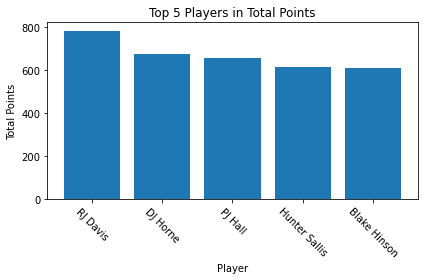

In [92]:
top5_PTS_players = acc_clean_df.sort_values(by=['PTS'], ascending=False).head(5).reset_index()

# Create a bar chart using Matplotlib
plt.bar(top5_PTS_players['Player'], top5_PTS_players['PTS'])
 
# Set the chart title and labels
plt.title('Top 5 Players in Total Points')
plt.xlabel('Player')
plt.ylabel('Total Points')

#rotate the player names for better readability
plt.xticks(rotation=315)
plt.tight_layout()

# Display the chart
plt.show()

B.) Correlation: Investigate whether there is any correlation between a player's field goal
percentage (FG%) and their win shares (WS). Provide a scatter plot and calculate the
correlation coefficient

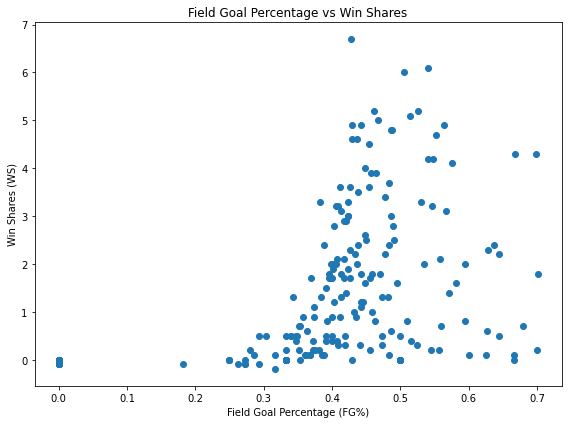

In [95]:
#create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(acc_clean_df['FG%'], acc_clean_df['WS'])

# Set chart title and labels
plt.title('Field Goal Percentage vs Win Shares')
plt.xlabel('Field Goal Percentage (FG%)')
plt.ylabel('Win Shares (WS)')

# Adjust layout for better appearance
plt.tight_layout()
plt.show()

In [101]:
from scipy import stats

In [103]:
corr, p_value = stats.pearsonr(acc_clean_df['FG%'], acc_clean_df['WS'])
# Print the results
print(f"Pearson correlation coefficient: {corr:.2f}")
print(f"P-value: {p_value:.4f}")

ValueError: array must not contain infs or NaNs

# Part 2: Reflection

***A.) What did you learn about working with CSV files and pandas DataFrames in
this assignment?***

During this assignment, I learned a few crucial lessons about CSV files and overall pandas DataFrames. Firstly, when I imported the file into a Dataframe, the firs row of the df was the granular names of each column. Therefore, I had to learn how to import the dataframe using pandas in a way that moved the first row of data into the column names. Furthermore, I got to learn several new functions such as idxmax that I had used before but not entirely understood. Lastly, one of the most significant things I learned was the use of reset_index() and groupby functions in conjunction with one another. I had used each several times before, but had not truly understood how they worked hand in hand, until the group by school portion of this assignment. I learned that when grouping by school, reset_index must be used to turn school back into a column name instead of the index in order to later select the school and other stats. To me, this is a quirky part of pandas DFs that I found particularly interesting

***B.) What was the most challenging aspect of this assignment, and how did you
overcome it?***

The most challenging part of this assignment was actually figuring out what I discussed above about resetting the index to convert school bac to a column. Originally, I was super confused when I tried to output the columns School and PTS from the school_totals df, and did not understand why it would not give me both columns, but seemed to print out fine when I only selected the PTS column. In order to fix this, I went to stack overflow and discovered that I had converted the school column to an index when using the groupby function. After fixing this problem, I had relatively few problems in the rest of the assignment.

***How do you think the insights gained from analyzing ACC basketball statistics
could be applied to other real-world datasets?***

While the actual code used in analyzing the ACC basketball statistics does not seem applicable in the real-world, the skills associated with doing so can be incredibly helpful. In terms of SQL, it is very easy to find the top whatever number of records from any given column. However, this assignment taught me how to do the same process with python, in that I now know how to order data sets, select all rows where a column's value is greater than a specific value, and group other statistics by certain columns/values. Each of these are crucial skills when dealing with real world data sets that may require advanced manipulation. Furthermore, this assignment taught me to carefully check my data before working with it to prevent problems with pieces such as the incorrect column headers or the column values being read in as the first row.